##### Copyright 2019 The TensorFlow Authors.



In [0]:
#@title Licensed under the Apache License, Version 2.0
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow Addons Layers: WeightNormalization

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/addons/tutorials/layers_weightnormalizations"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/addons/blob/master/docs/tutorials/layers_weightnormalization.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/addons/blob/master/docs/tutorials/layers_weightnormalizations.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

# Overview

This notebook will demonstrate how to use the Weight Normalization layer and how it can improve convergence.


# WeightNormalization

A Simple Reparameterization to Accelerate Training of Deep Neural Networks:

Tim Salimans, Diederik P. Kingma (2016)

> By reparameterizing the weights in this way we improve the conditioning of the optimization problem and we speed up convergence of stochastic gradient descent. Our reparameterization is inspired by batch normalization but does not introduce any dependencies between the examples in a minibatch. This means that our method can also be applied successfully to recurrent models such as LSTMs and to noise-sensitive applications such as deep reinforcement learning or generative models, for which batch normalization is less well suited. Although our method is much simpler, it still provides much of the speed-up of full batch normalization. In addition, the computational overhead of our method is lower, permitting more optimization steps to be taken in the same amount of time.

> https://arxiv.org/abs/1602.07868 

<img src="https://raw.githubusercontent.com/seanpmorgan/tf-weightnorm/master/static/wrapped-graph.png" width="80%"><br><br>


## Setup

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
try:
  %tensorflow_version 2.x
except:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
!pip install  --no-deps tensorflow-addons~=0.6

In [0]:
import tensorflow_addons as tfa
import numpy as np
from matplotlib import pyplot as plt

In [0]:
# Hyper Parameters
batch_size = 32
epochs = 10
num_classes=10

## Build Models

In [0]:
# Standard ConvNet
reg_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, 5, activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, 5, activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

In [0]:
# WeightNorm ConvNet
wn_model = tf.keras.Sequential([
    tfa.layers.WeightNormalization(tf.keras.layers.Conv2D(6, 5, activation='relu')),
    tf.keras.layers.MaxPooling2D(2, 2),
    tfa.layers.WeightNormalization(tf.keras.layers.Conv2D(16, 5, activation='relu')),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(120, activation='relu')),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(84, activation='relu')),
    tfa.layers.WeightNormalization(tf.keras.layers.Dense(num_classes, activation='softmax')),
])

## Load Data

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

170500096/170498071 [==============================] - 6s 0us/step


## Train Models

In [0]:
reg_model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

reg_history = reg_model.fit(x_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_data=(x_test, y_test),
                            shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 12s 248us/sample - loss: 1.6517 - accuracy: 0.3930 - val_loss: 1.4770 - val_accuracy: 0.4683
Epoch 2/10
50000/50000 [==============================] - 7s 149us/sample - loss: 1.3884 - accuracy: 0.4997 - val_loss: 1.3539 - val_accuracy: 0.5203
Epoch 3/10
50000/50000 [==============================] - 7s 146us/sample - loss: 1.2771 - accuracy: 0.5436 - val_loss: 1.2423 - val_accuracy: 0.5561
Epoch 4/10
50000/50000 [==============================] - 7s 149us/sample - loss: 1.1992 - accuracy: 0.5727 - val_loss: 1.2398 - val_accuracy: 0.5538
Epoch 5/10
50000/50000 [==============================] - 8s 155us/sample - loss: 1.1361 - accuracy: 0.5969 - val_loss: 1.1646 - val_accuracy: 0.5823
Epoch 6/10
50000/50000 [==============================] - 7s 148us/sample - loss: 1.0858 - accuracy: 0.6136 - val_loss: 1.2045 - val_accuracy: 0.5771
Epoch 7/10
50000/50000 [=========================

In [0]:
wn_model.compile(optimizer='adam', 
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

wn_history = wn_model.fit(x_train, y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          validation_data=(x_test, y_test),
                          shuffle=True)

Instructions for updating:
Please use `layer.add_weight` method instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 16s 312us/sample - loss: 1.5783 - accuracy: 0.4244 - val_loss: 1.3843 - val_accuracy: 0.4899
Epoch 2/10
50000/50000 [==============================] - 13s 256us/sample - loss: 1.3045 - accuracy: 0.5321 - val_loss: 1.2529 - val_accuracy: 0.5511
Epoch 3/10
50000/50000 [==============================] - 13s 255us/sample - loss: 1.1874 - accuracy: 0.5783 - val_loss: 1.2004 - val_accuracy: 0.5736
Epoch 4/10
50000/50000 [==============================] - 13s 252us/sample - loss: 1.1073 - accuracy: 0.6072 - val_loss: 1.1745 - val_accuracy: 0.5780
Epoch 5/10
50000/50000 [==============================] - 13s 251us/sample - loss: 1.0462 - accuracy: 0.6307 - val_loss: 1.1277 - val_accuracy: 0.6053
Epoch 6/10
50000/50000 [==============================] - 12s 247us/sample - loss: 0.9931 - accuracy: 0.6483 - val_loss: 1

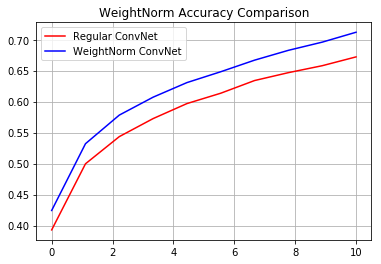

In [0]:
reg_accuracy = reg_history.history['accuracy']
wn_accuracy = wn_history.history['accuracy']

plt.plot(np.linspace(0, epochs,  epochs), reg_accuracy,
             color='red', label='Regular ConvNet')

plt.plot(np.linspace(0, epochs, epochs), wn_accuracy,
         color='blue', label='WeightNorm ConvNet')

plt.title('WeightNorm Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()